 # ĐỒ ÁN CUỐI KỲ - LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
 
 Họ tên: Nguyễn Trường An
 
 MSSV: 1712262

---

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---

## Lấy dữ liệu

* Dữ liệu được dùng trong đồ án này là file "dataanime.csv" đính kèm. Đây là dữ liệu về những bộ anime (phim hoạt hình Nhật Bản) được lấy từ trang kaggle.com, và gốc của dữ liệu là [ở đây](https://www.kaggle.com/canggih/anime-data-score-staff-synopsis-and-genre)
* License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) cho phép sao chép, chia sẻ, biến đổi,... dựa trên dữ liệu gốc.
* Dữ liệu được thu thập từ trang: [MyAnimeList.net](http://www.myanimelist.net)

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
anime_df = pd.read_csv("dataanime.csv")
anime_df.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Producers,Studios,Sources,Genres,Rating,Score,Scored by,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,4/5/2009,7/4/2010,Spring,"Aniplex,Square Enix,Mainichi Broadcasting Syst...",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387
1,Kimi no Na wa.,Movie,1,Finished Airing,8/26/2016,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936
2,Gintama°,TV,51,Finished Airing,4/8/2015,3/30/2016,Spring,"TV Tokyo,Aniplex,Dentsu",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597
3,Steins;Gate 0,TV,23,Currently Airing,4/12/2018,-,Spring,Nitroplus,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117
4,Steins;Gate,TV,24,Finished Airing,4/6/2011,9/14/2011,Spring,"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột rồi lần lượt lưu vào 2 biến là `num_rows` và `num_cols`. 

In [3]:
num_rows, num_cols = anime_df.shape
print("Dữ liệu này có {} dòng và {} cột".format(num_rows, num_cols))

Dữ liệu này có 1563 dòng và 16 cột


### Mỗi dòng và mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả các cột có trong file "dataanime.csv":
- **Title**: Tên của bộ anime, title là duy nhất dùng để phân biệt.
- **Type**: Hình thức trình chiếu (Truyền hình/TV, OVA, ONA,...). Xem thêm tại [đây](https://giaivadap.com/kt/ova-la-gi-ona-la-gi-oad-la-gi-the-loai-phim-gi)
- **Episodes**: Số tập của bộ anime đó.
- **Status**: Tình trạng phát sóng của bộ anime này ("Finished Airing" là đã kết thúc, "Currently Airing" là đang phát sóng).
- **Start airing**: Thời gian (Date) bắt đầu phát sóng bộ anime này.
- **End airing**: Thời gian (Date) kết thúc phát sóng bộ anime này.
- **Starting season**: Anime được phân chia và xếp hạng theo mùa. "Starting season" cho biết anime thuộc mùa nào trong năm (Spring, Summer, Fall, Winter).
- **Producers**: Nhà sản xuất của bộ anime đó. Một anime thường là sự hợp tác của nhiều nhà sản xuất với nhau.
- **Studios**: Xưởng phim sản xuất của những bộ anime. Khác với Producer, một bộ anime thường chỉ được làm ở 1 Studio.
- **Sources**: Những bộ anime được sản xuất có nguồn gốc từ đâu (manga, light novel, book, original...). Xem giải thích một số thuật ngữ tại [đây](https://chuuniotaku.com/light-novel-la-gi/)
- **Genres**: Anime được chia thành rất nhiều thể loại khác nhau để phù hợp với nhu cầu của người xem. Và mỗi bộ thường là sự kết hợp của ít nhất 2 thể loại trở lên.
- **Rating**: Phân loại theo [Hệ thống phân loại phim ảnh hiện hành của MPAA](https://vi.wikipedia.org/wiki/H%E1%BB%87_th%E1%BB%91ng_ph%C3%A2n_lo%E1%BA%A1i_phim_c%E1%BB%A7a_MPAA).
- **Score**: Điểm đánh giá của bộ anime đó tính trên thang 10 điểm. 
- **Scored by**: Số lượt đánh giá của bộ anime đó.
- **Members**: Số lượng thành viên của bộ anime đó.
- **Favorites**: Số lượt yêu thích của bộ anime đó.

Mỗi dòng trong `anime_df` ứng với thông tin của một bộ anime.

### Mỗi cột  có dtype là gì?

Lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `anime_df` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 

In [4]:
col_dtypes = anime_df.dtypes
col_dtypes

Title               object
Type                object
Episodes            object
Status              object
Start airing        object
End airing          object
Starting season     object
Producers           object
Studios             object
Sources             object
Genres              object
Rating              object
Score              float64
Scored by            int64
Members              int64
Favorites            int64
dtype: object

**<font color=red>Vấn đề:</font>**
- Cột "Start airing" và "End airing" đang có kiểu dữ liệu là `object`. Do 2 cột này là 2 mốc thời gian bắt đầu và kết thúc nên để có thể khám phá thêm về 2 cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.
- Cột "Episodes" cũng đang có kiểu dữ liệu là object. Tuy nhiên, cột này thể hiện số tập phim nên phải là số nguyên. Để có thể tiếp tục khám phá thêm về cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `int`.

---

## Tiền xử lý

### Đổi tên cột "Rating"

Cột "Rating" dễ bị nhầm lẫn với xếp hạng (ta đã có cột "Score" để xếp hạng). Trong khi cột này chứa các giá trị để phân loại phim theo độ tuổi, ta sẽ đổi tên lại thành "Classification".

In [5]:
anime_df = anime_df.rename(columns={'Rating':'Classification'})
anime_df.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Producers,Studios,Sources,Genres,Classification,Score,Scored by,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,4/5/2009,7/4/2010,Spring,"Aniplex,Square Enix,Mainichi Broadcasting Syst...",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387
1,Kimi no Na wa.,Movie,1,Finished Airing,8/26/2016,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936
2,Gintama°,TV,51,Finished Airing,4/8/2015,3/30/2016,Spring,"TV Tokyo,Aniplex,Dentsu",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597
3,Steins;Gate 0,TV,23,Currently Airing,4/12/2018,-,Spring,Nitroplus,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117
4,Steins;Gate,TV,24,Finished Airing,4/6/2011,9/14/2011,Spring,"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365


### Thay thế các giá trị "-" thành NaN

Hầu hết các cột có dtype là object *(Start airing, End airing, Starting season, Sources, Produces, Studios,...)* đều chứa rất nhiều giá trị "-" gây khó khăn và xảy ra lỗi cho việc chuyển đổi và tính toán sau này. Do đó ta sẽ thực hiện replace các giá trị "-" thành NaN.

In [6]:
anime_df = anime_df.replace("-", np.nan)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1563 non-null   object 
 1   Type             1563 non-null   object 
 2   Episodes         1552 non-null   object 
 3   Status           1563 non-null   object 
 4   Start airing     1549 non-null   object 
 5   End airing       978 non-null    object 
 6   Starting season  821 non-null    object 
 7   Producers        1187 non-null   object 
 8   Studios          1517 non-null   object 
 9   Sources          1463 non-null   object 
 10  Genres           1563 non-null   object 
 11  Classification   1563 non-null   object 
 12  Score            1563 non-null   float64
 13  Scored by        1563 non-null   int64  
 14  Members          1563 non-null   int64  
 15  Favorites        1563 non-null   int64  
dtypes: float64(1), int64(3), object(12)
memory usage: 195.5+ KB


### Chuyển dtype của cột "Start airing" và "End airing" sang datetime

Thực hiện chuyển `dtype` của 2 cột "Start airing" và "End airing" sang kiểu dữ liệu thời gian (sau khi làm xong thì 2 cột này trong `anime_df` sẽ thay đổi thành `datetime64[ns]`). Ở đây ta sẽ dùng câu lệnh `pd.to_datetime` và để Pandas tự đoán format vì dữ liệu không nhiều và có chứa NaN. Giá trị NaN này sẽ được chuyển thành NaT trong `datetime64[ns]`.

In [7]:
# Chuyển đổi 2 cột "Start airing" và "End airing" sang định dạng datetime
anime_df["Start airing"] = pd.to_datetime(anime_df["Start airing"])
anime_df["End airing"] = pd.to_datetime(anime_df["End airing"])
# Kiểm tra dtypes của 2 cột sau khi chuyển đổi
print(anime_df[["Start airing","End airing"]].dtypes)
# Test ô 382 ban đầu chứa giá trị NaN:
print("\nData type of cell 382 after being transformed:", anime_df["Start airing"].iloc[382])

Start airing    datetime64[ns]
End airing      datetime64[ns]
dtype: object

Data type of cell 382 after being transformed: NaT


### Chuyển dtype của cột "Episodes" sang float

Chuyển đổi `dtype` của cột "Episodes" thành float khá đơn giản bằng `astype(float)`.

In [8]:
anime_df["Episodes"] = anime_df["Episodes"].astype(float)
anime_df["Episodes"].dtype

dtype('float64')

---

## Quay lại bước khám phá dữ liệu

### Các cột dạng numeric và datetime có miền giá trị như thế nào?

In [9]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            1563 non-null   object        
 1   Type             1563 non-null   object        
 2   Episodes         1552 non-null   float64       
 3   Status           1563 non-null   object        
 4   Start airing     1549 non-null   datetime64[ns]
 5   End airing       978 non-null    datetime64[ns]
 6   Starting season  821 non-null    object        
 7   Producers        1187 non-null   object        
 8   Studios          1517 non-null   object        
 9   Sources          1463 non-null   object        
 10  Genres           1563 non-null   object        
 11  Classification   1563 non-null   object        
 12  Score            1563 non-null   float64       
 13  Scored by        1563 non-null   int64         
 14  Members          1563 non-null   int64  

Ta có 7 cột có dạng numeric hoặc datetime: "Episodes", "Start airing", "End airing", "Score", "Score by", "Members", "Favorites". Thực hiện tính miền giá trị (min, max) của 7 cột này và lưu kết quả vào dataframe `col_ranges_df`. Dataframe này có 2 dòng là "min", "max"; có 7 cột là "Episodes", "Start airing", "End airing", "Score", "Score by", "Members", "Favorites".

In [10]:
num_col_names = anime_df.dtypes.index[anime_df.dtypes != "object"]
col_ranges_df = anime_df.loc[:, num_col_names].agg(["min", "max"])
col_ranges_df

,Episodes,Start airing,End airing,Score,Scored by,Members,Favorites
min,1.0,1970-04-01,1971-09-29,7.48,144,781,1
max,1787.0,2018-04-13,2019-08-16,9.25,993775,1432871,105387


### Các cột dạng categorical có các giá trị nào?

In [11]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            1563 non-null   object        
 1   Type             1563 non-null   object        
 2   Episodes         1552 non-null   float64       
 3   Status           1563 non-null   object        
 4   Start airing     1549 non-null   datetime64[ns]
 5   End airing       978 non-null    datetime64[ns]
 6   Starting season  821 non-null    object        
 7   Producers        1187 non-null   object        
 8   Studios          1517 non-null   object        
 9   Sources          1463 non-null   object        
 10  Genres           1563 non-null   object        
 11  Classification   1563 non-null   object        
 12  Score            1563 non-null   float64       
 13  Scored by        1563 non-null   int64         
 14  Members          1563 non-null   int64  

`anime_df` có 8 cột dạng categorical là "Type", "Status", "Starting season", "Producers", "Studios", "Sources", "Genres", "Classification". Tuy nhiên, ta sẽ không xét cột "Status" vì nó chỉ có 2 trạng thái là "Finished Airing" và "Currently Airing". 7 cột còn lại ta tính "range" của mỗi cột này: số lượng các giá trị khác nhau (không tính NaN), và list gồm 3 giá trị khác nhau đầu tiên sau khi đã sort tăng dần tất cả các giá trị khác nhau. Kết quả lưu vào dataframe `cat_col_ranges_df`. Dataframe này có 2 dòng là "num_unique_values", "three_first_values"; và có 7 cột là "Type", "Starting season", "Producers", "Studios", "Sources", "Genres", "Classification".

In [12]:
cat_col_names = set(anime_df.dtypes.index[anime_df.dtypes == "object"]) - {"Title","Status"}
num_unique_values = anime_df.nunique()
three_first_values = anime_df[cat_col_names].apply(lambda x: list(x.sort_values().unique())[:3])
cat_col_ranges_df = pd.DataFrame(columns=cat_col_names)
cat_col_ranges_df.loc["num_unique_values"]=num_unique_values
cat_col_ranges_df.loc["three_first_values"]=three_first_values
cat_col_ranges_df

,Studios,Producers,Type,Genres,Classification,Starting season,Sources
num_unique_values,199,808,6,1003,4,4,13
three_first_values,"[8bit, A-1 Pictures, A-1 Pictures,Bridge]","[5pb., AIC, AMG MUSIC]","[Movie, Music, ONA]","[Action, Action,Adventure, Action,Adventure,Co...","[G, PG, PG-13]","[Fall, Spring, Summer]","[4-koma manga, Book, Card game]"


### Mỗi cột có bao nhiêu giá trị thiếu?

Ta tính số lượng giá trị thiếu của mỗi cột và lưu kết quả vào series `col_num_nans`, trong đó index là tên cột.

In [13]:
col_num_nans = anime_df[["Episodes", "Start airing", "End airing", "Starting season", "Producers", "Studios", "Sources"]].isna().sum()
col_num_nans

Episodes            11
Start airing        14
End airing         585
Starting season    742
Producers          376
Studios             46
Sources            100
dtype: int64

---

## Đưa ra các câu hỏi cần trả lời

Dưới đây là một số câu hỏi có thể trả lời bằng dữ liệu:
- Những bộ anime nào đáng xem nhất theo mỗi phân loại (Classification)?
- Số lượng anime được sản xuất theo mỗi thể loại (Genres) là bao nhiêu?
- Trong 10 năm gần đây, 3 nguồn (Sources) chất lượng nhất dùng để chuyển thể sang anime có sự thay đổi như thế nào?

---

## Tiền xử lý

### Thêm cột "Year" vào dataframe

Câu hỏi thứ 3 ở trên cần sử dụng đến năm phát sóng của bộ anime. Vì vậy, ta sẽ thêm cột "Year" vào `anime_df`. Tuy nhiên, ở đây ta chỉ xét đến năm bắt đầu phát sóng của bộ anime này, tức sử dụng năm của "Start airing".

In [14]:
anime_df["Year"]=anime_df["Start airing"].dt.year
anime_df.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Producers,Studios,Sources,Genres,Classification,Score,Scored by,Members,Favorites,Year
0,Fullmetal Alchemist: Brotherhood,TV,64.0,Finished Airing,2009-04-05,2010-07-04,Spring,"Aniplex,Square Enix,Mainichi Broadcasting Syst...",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387,2009.0
1,Kimi no Na wa.,Movie,1.0,Finished Airing,2016-08-26,NaT,NaN,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936,2016.0
2,Gintama°,TV,51.0,Finished Airing,2015-04-08,2016-03-30,Spring,"TV Tokyo,Aniplex,Dentsu",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597,2015.0
3,Steins;Gate 0,TV,23.0,Currently Airing,2018-04-12,NaT,Spring,Nitroplus,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117,2018.0
4,Steins;Gate,TV,24.0,Finished Airing,2011-04-06,2011-09-14,Spring,"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365,2011.0


---

## Phân tích dữ liệu để trả lời cho các câu hỏi

### Những bộ anime nào đáng xem nhất theo mỗi phân loại (Classification)?

Để đánh giá bộ nào đáng xem, ta sẽ dựa vào tiêu chí "Score". Kết quả được lưu vào dataframe `BestAnimes`. DataFrame này có 3 cột là Classification (phân loại theo tuổi), Title (tên anime) và Score (Số điểm đánh giá); mỗi dòng là thông tin của 1 bộ anime đáng xem nhất theo phân lớp độ tuổi đó.

In [15]:
idx = anime_df.groupby("Classification")["Score"].idxmax()
BestAnimes=anime_df[["Classification","Title","Score"]].iloc[idx].sort_values(by ='Score', ascending=False)
BestAnimes.reset_index(drop=True)

,Classification,Title,Score
0,R,Fullmetal Alchemist: Brotherhood,9.25
1,PG-13,Kimi no Na wa.,9.19
2,PG,Sen to Chihiro no Kamikakushi,8.92
3,G,Howl no Ugoku Shiro,8.73


#### **Ý nghĩa:**

Kết quả thu được giúp cho những người chưa xem anime bao giờ (muốn xem thử) cũng như những người đã xem (muốn xem thêm) tìm được những bộ đáng xem nhất. Quan trọng hơn hết là nó phù hợp với độ tuổi, ở đây ta nhắc lại về Classification:
- G: Dành cho mọi lứa tuổi.
- R: Thanh thiếu niên 17 tuổi cần sự cho phép của người lớn.
- PG-13: Không phù hợp với trẻ dưới 13 tuổi.
- PG: Không phù hợp với trẻ nhỏ.

### Số lượng anime được sản xuất theo mỗi thể loại (Genres) là bao nhiêu?

Để trả lời cho câu hỏi này, ta sẽ làm 2 bước sau:
- Bước 1: Từ cột "Genres" ta tính số lượng anime được sản xuất dựa trên thể loại (Ví dụ: "Sci-Fi,Thriller" thì ta cộng 1 cho "Sci-Fi" và cộng 1 cho "Thriller"). Kết quả sẽ được lưu vào series `num_genres`, series này có index là genres.
- Bước 2: Vẽ đồ thị dạng bar chart, trong đó trục tung là thể loại, trục hoành là số lượng phim đã sản xuất. Đặt tên trục hoành là "NumAnimes", đặt tên trục tung là "Genres".

Code bước 1.

In [16]:
df = anime_df
df = df['Genres'].str.split(',', expand=True)
num_genres = df.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
num_genres

Action           563.0
Adventure        362.0
Cars              15.0
Comedy           763.0
Dementia           7.0
Demons            66.0
Drama            515.0
Fantasy          345.0
Game              33.0
Harem             17.0
Historical       152.0
Horror            36.0
Josei             30.0
Kids              31.0
Magic            146.0
Martial Arts      43.0
Mecha            118.0
Military         123.0
Music             78.0
Mystery          215.0
Parody            75.0
Police            66.0
Psychological     91.0
Romance          352.0
Samurai           39.0
School           296.0
Sci-Fi           292.0
Seinen           152.0
Shoujo           130.0
Shoujo Ai         13.0
Shounen          450.0
Shounen Ai        21.0
Slice of Life    320.0
Space             72.0
Sports           132.0
Super Power      130.0
Supernatural     304.0
Thriller          44.0
Vampire           24.0
dtype: float64

Code bước 2.

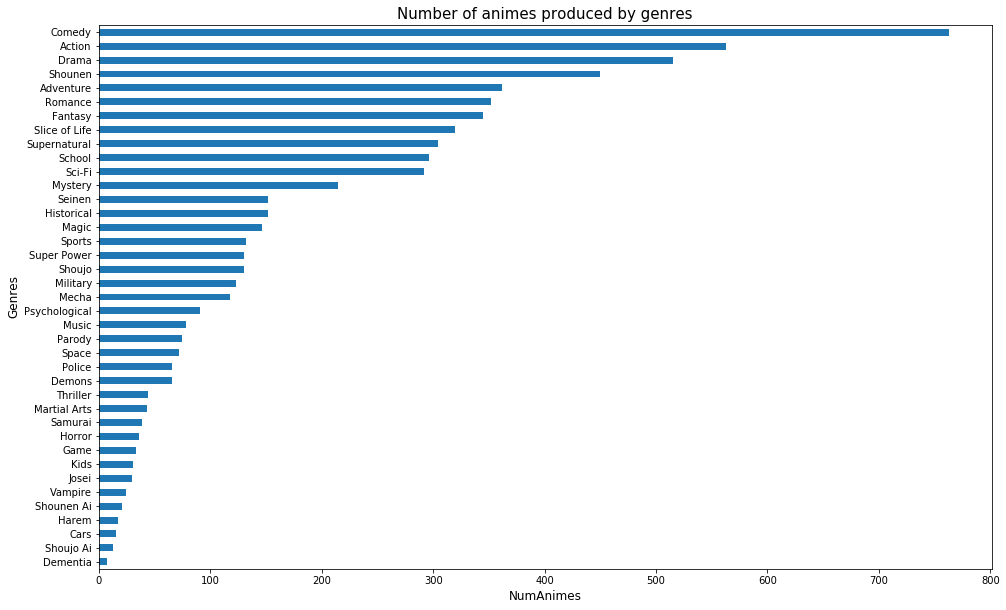

In [17]:
plt.figure(figsize=(16,10))
num_genres.sort_values().plot.barh()
plt.title("Number of animes produced by genres", fontsize=15)
plt.xlabel("NumAnimes", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.show()

**Ý nghĩa:**

Kết quả cho ta thấy những thể loại nào sẽ được sản xuất từ nhiều nhất đến ít nhất. Có vẻ các yếu tố (Comedy, Action, Drama) được người xem rất ưa chuộng nên mới được Producers thêm vào nhiều như vậy. Đặc biệt là Comedy (Hài hước) được đặt lên hàng đầu, yếu tố này rất quan trọng trong 1 bộ anime, tạo nên sự cân bằng để bộ anime có thể thu hút được khán giả.

### Trong 10 năm gần đây, 3 nguồn (Sources) chất lượng nhất dùng để chuyển thể sang anime có sự thay đổi như thế nào?

Để trả lời cho câu hỏi này, ta sẽ thực hiện qua 2 bước:
- Bước 1: Tính dataframe `num_three_best_sources` gồm 3 cột Year (Năm), Sources (Các loại nguồn để sản xuất thành anime) và "counts" (số lượng anime của mỗi nguồn theo năm); và 10 dòng ứng với 10 năm (2009,2010,...2018).
- Bước 2: Từ kết quả trên, ta vẽ 3 đường dạng line (ứng với mỗi sources) trên cùng một đồ thị, trong đó trục hoành là năm và trục tung là số lượng được chuyển thể. Đặt tên cho trục hoành là "Year", trục tung là "NumAdaptions".

Code bước 1.

In [18]:
# Groupby theo Year và Sources
ten_recent_years = anime_df[anime_df.Year > anime_df.Year.max()-10]
num_animes_each_source = ten_recent_years.groupby(["Year","Sources"])["Title"].agg("count").reset_index(name='counts')
num_animes_each_source.Year=num_animes_each_source.Year.astype(int)
num_animes_each_source

,Year,Sources,counts
0,2009,4-koma manga,5
1,2009,Game,5
2,2009,Light novel,9
3,2009,Manga,36
4,2009,Novel,5
...,...,...,...
89,2018,Manga,21
90,2018,Novel,2
91,2018,Original,8
92,2018,Visual novel,1


In [19]:
# Lấy ra 3 nguồn (Sources) tốt nhất.
three_best_sources = num_animes_each_source.groupby("Sources")["counts"].agg("sum").sort_values(ascending=False)[:3]
three_best_sources = sorted(three_best_sources.index)
three_best_sources

['Light novel', 'Manga', 'Original']

In [20]:
# Tạo DataFrame num_three_best_sources
df = num_animes_each_source
src = three_best_sources
num_three_best_sources=pd.DataFrame(columns=src,index=range(2009,2019))
for year in range(2009,2019):
    data=df[(df.Year==year) & ((df.Sources==src[0])|(df.Sources==src[1])|(df.Sources==src[2]))].counts
    num_three_best_sources.loc[year]=list(data)
num_three_best_sources

,Light novel,Manga,Original
2009,9,36,10
2010,8,37,11
2011,8,42,19
2012,8,42,14
2013,12,42,20
2014,8,60,20
2015,16,60,20
2016,11,60,17
2017,19,52,15
2018,4,21,8


Code bước 2.

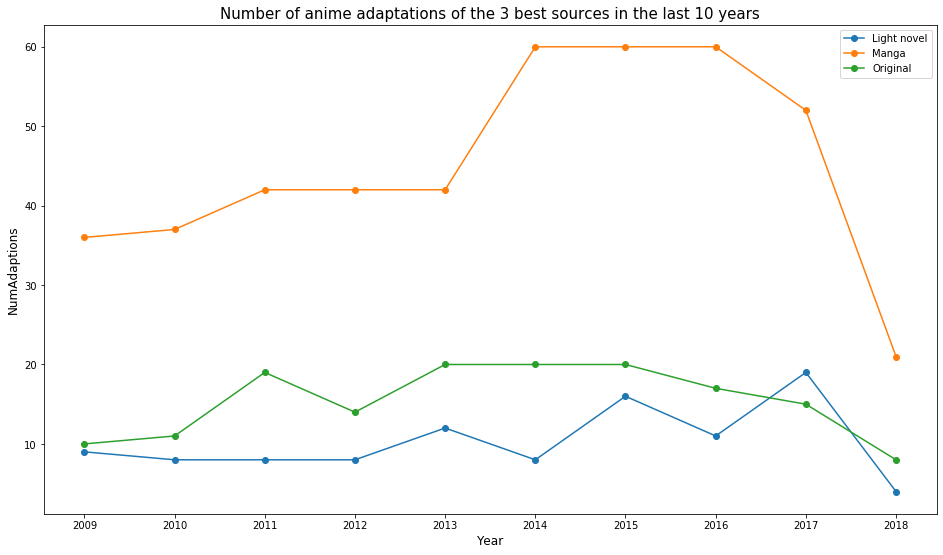

In [21]:
# Vẽ đồ thị
plt.figure(figsize=(16,9))
plt.plot(num_three_best_sources, marker="o")
plt.xticks(range(2009,2019,1))
plt.xlabel("Year", fontsize=12)
plt.ylabel("NumAdaptions", fontsize=12)
plt.title("Number of anime adaptations of the 3 best sources in the last 10 years", fontsize=15)
plt.legend(src)
plt.show()

**Ý nghĩa:**

Trong 10 năm gần đây, có thể thấy việc chuyển thể từ manga sang anime luôn chiếm ưu thế áp đảo 2 thể loại đứng Top2 và Top3. Điều này chứng tỏ nếu đã có manga làm nền trước đó thì khả năng được sản xuất thành anime là khá cao. Kết quả này khuyến khích những tác giả nên vẽ manga (truyện tranh) nhiều hơn để tác phẩm của mình được biết đến rộng rãi và có thể kiếm được một khoản kha khá từ việc mua bản quyền từ Producers.

---

## Nhìn lại quá trình làm đồ án

### Khó khăn:
- Dữ liệu có vẻ hơi thiếu xót (cần có cột ID để định danh) vì có rất nhiều bộ anime trùng tên được những nhà sản xuất và xưởng phim khác nhau làm lại. Mặc dù người thu nhập dữ liệu đã xử lý để các Title không trùng nhau nhưng chung quy thì vẫn là cùng 1 bộ phim, nếu phân biệt bằng ID thì sẽ rõ ràng hơn.
- Việc đưa ra được một câu hỏi có ý nghĩa cần tốn khá nhiều thời gian và công sức.

### Những thứ học được:
- Khả năng sử dụng thư viện numpy, pandas chuyên nghiệp hơn.
- Nắm vững 1 quy trình khoa học dữ liệu là như thế nào.

### Làm gì nếu có thêm thời gian:
- Đặt thêm nhiều câu hỏi thú vị hơn.
- Tìm hiểu thêm trực quan hóa dữ liệu để thể hiện biểu đồ đẹp mắt.

## Tài liệu tham khảo:

Tham khảo template "BT03-Pandas.ipynb" trên [thùng chứa môn học](https://drive.google.com/drive/folders/1EKaa7pQZMK4m0_gNQNf4oafXgPMQzbBc)